# Selection modele -------------------------------------Menacer Nasreddine


Pour un jeu de donnée (Red Wine), j'ai utilisé deux algorithme , un algorithme de K plus proches voisins , et un algorithme de Regression Logistic 

# 1-Kppv

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors

Premièrement j'ai chargé le fichier RedW.mat , qui contient 1599 echantillons de vin rouge avec 11 caractéristiques labelisés (0 et 1)  

In [59]:
data=loadmat('RedW.mat')

comme notre fichier et une liste de liste j'ai séparé les points et les étiquetes 

In [82]:
X=data['X']
Y=data['Y']

ici j'ai séparé les données on prenant les 599 premier points comme données d'entrainement et les points restants comme points de test.  
Le jeu d’entraînement sert à entraîner mes deux algorithme. 
Le jeu de test sert à sélectionner un modèle  (on choisit celui qui a la meilleure performance sur ce jeu)

In [83]:
X_train=X[0:598,:]
y_train=Y[0:598,:]
X_test=X[598:1599,:]
y_test=Y[598:1599,:]

ici j'ai standardisé les données d’entraînement et les données de test 


In [84]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

j'ai utiliser la méthode (GridSearchCV) pour faire une validation croisée du paramètre et trouvé le nombre de plus proches voisins sur le jeu d’entraînement

-j'ai fixer les valeurs des hyperparamètres à tester de 1 jusqu'a 24

-puis j'ai créer un classifieur kppv avec une recherche d'hyperparamètre par validation croisée

-puis j'ai fais une prédiction des labels sur les données de test standardisées  


In [85]:
from sklearn import neighbors, metrics

### hyperparamètres à tester
param_grid = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]}

#Choisir un score à optimiser, j'ai choisis 'l'accuracy'
score = 'accuracy'

# j'ai créer un classifieur kppv avec une recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),param_grid,cv=5,scoring=score)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

for mean, std, params in zip(clf.cv_results_['mean_test_score'],clf.cv_results_['std_test_score'],clf.cv_results_['params']):
    print ("\t%s = %0.3f (+/-%0.03f) for %r" % (score,mean,std * 2,params))

y_pred = clf.predict(X_test_std)

print ("Meilleur hyperparamètre sur le jeu d'entraînement:",)
print (clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

	accuracy = 0.651 (+/-0.040) for {'n_neighbors': 1}
	accuracy = 0.624 (+/-0.091) for {'n_neighbors': 2}
	accuracy = 0.639 (+/-0.044) for {'n_neighbors': 3}
	accuracy = 0.629 (+/-0.082) for {'n_neighbors': 4}
	accuracy = 0.651 (+/-0.106) for {'n_neighbors': 5}
	accuracy = 0.647 (+/-0.119) for {'n_neighbors': 6}
	accuracy = 0.654 (+/-0.107) for {'n_neighbors': 7}
	accuracy = 0.654 (+/-0.103) for {'n_neighbors': 8}
	accuracy = 0.649 (+/-0.095) for {'n_neighbors': 9}
	accuracy = 0.651 (+/-0.077) for {'n_neighbors': 10}
	accuracy = 0.662 (+/-0.088) for {'n_neighbors': 11}
	accuracy = 0.671 (+/-0.092) for {'n_neighbors': 12}
	accuracy = 0.669 (+/-0.076) for {'n_neighbors': 13}
	accuracy = 0.667 (+/-0.088) for {'n_neighbors': 14}
	accuracy = 0.666 (+/-0.099) for {'n_neighbors': 15}
	accuracy = 0.664 (+/-0.109) for {'n_neighbors': 16}
	accuracy = 0.659 (+/-0.100) for {'n_neighbors': 17}
	accuracy = 0.666 (+/-0.098) for {'n_neighbors': 18}
	accuracy = 0.671 (+/-0.095) for {'n_neighbors': 19}
	a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

L'affichage précédent montre la performance calculé avec chaque nombre de voisins fixé au paravant 

la meilleure performance (~0.682) est ici atteinte avec 23 voisins

Aprés avoir prédit les labels des données test , je vais utiliser une PCA pour visualiser ces données 

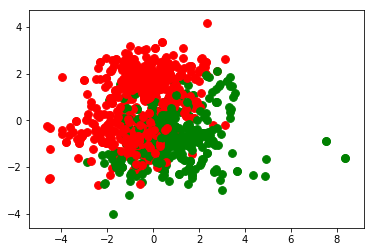

In [86]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_test_std)

for i in range(len(Y_sklearn)):
    if y_pred[i]==1:
        plt.scatter(Y_sklearn[i,0],Y_sklearn[i,1],c='red',s=60)
    else:
        plt.scatter(Y_sklearn[i,0],Y_sklearn[i,1],c='green',s=60)
plt.show() 

Evaluation de l'algorithme Kppv

In [88]:
##calcul de la matrice de confusion 
from sklearn.metrics import confusion_matrix
MC=confusion_matrix(y_test, y_pred)
print(MC)

[[291 157]
 [122 431]]


In [89]:
precision=MC[0,0]/(MC[0,0]+MC[0,1])
Taux_bonne_reconnaissance= (MC[0,0]+MC[1,1])/1598
print("le taux de precision pour un Kppv est:",precision)
print("le taux de bonne reconnaissance  pour un Kppv est:",Taux_bonne_reconnaissance)

le taux de precision pour un Kppv est: 0.649553571429
le taux de bonne reconnaissance  pour un Kppv est: 0.451814768461


# 2-Regression logistique 


a l'aide de Sklearn j'ai créé un model de Regression logistic 

In [90]:
from sklearn.linear_model import LogisticRegression
s = 8
LR_clf = LogisticRegression(random_state=s)
LR_clf
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Pour la regression logistique j'ai aussi utilisé une validation croisée sur les données d'apprentissage 

In [91]:
cv_scores = cross_val_score(LR_clf, X_train, y_train, cv=10, scoring='accuracy')
print('les scores aprés itteration sont {}: '.format(cv_scores))
print('le score moyen est {}  : '.format(cv_scores.mean()))

les scores aprés itteration sont [ 0.67213115  0.67213115  0.68333333  0.8         0.83333333  0.73333333
  0.71186441  0.81355932  0.6440678   0.6440678 ]: 
le score moyen est 0.7207821617115866  : 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

prédiction des labels pour les données test standardisé  

In [92]:
LR_clf.fit(X_train_std, y_train)
pred_LR = LR_clf.predict(X_test_std) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pour pouvoir evalué l'algorithme , on calcule la matrice de confusion , pour pouvoir calculer la precision et le taux de bonne reconnaissance 

In [93]:
### calcul de la matrice de confusion 
MC1=confusion_matrix(y_test, pred_LR)
print("le taux de precision pour la Regression logistic est:",precision1)

la matrice de confusion pour la Regression logistic est: [[282 166]
 [ 99 454]]


In [95]:
precision1=MC1[0,0]/(MC[0,0]+MC1[0,1])
Taux_bonne_reconnaissance1= (MC1[0,0]+MC1[1,1])/1598
print("le taux de precision pour un Kppv est:",precision)
print("le taux de bonne reconnaissance  pour un Kppv est:",Taux_bonne_reconnaissance)

le taux de precision pour un Kppv est: 0.649553571429
le taux de bonne reconnaissance  pour un Kppv est: 0.451814768461


Aprés avoir prédit les labels des données test , je vais utiliser une PCA pour visualiser ces données 

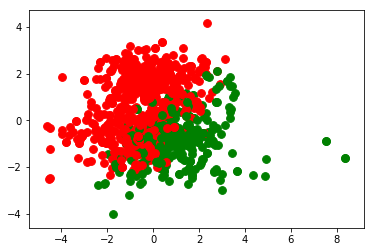

In [96]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca1 = sklearnPCA(n_components=2)
Y_sklearn1 = sklearn_pca.fit_transform(X_test_std)

for i in range(len(Y_sklearn)):
    if pred_LR[i]==1:
        plt.scatter(Y_sklearn1[i,0],Y_sklearn1[i,1],c='red',s=60)
    else:
        plt.scatter(Y_sklearn1[i,0],Y_sklearn1[i,1],c='green',s=60)
plt.show() 

# 3-Conclusion

Aprés avoir testé les deux algorithme (Kppv, et Regression Logistique) sur la base de données Red Wine, et d'aprés les resultat que j'ai eu dans le calcul de la precision et du taux de bonne classification, on remarque que la Regression logistique donne un taux de bonne reconnaissance légerement meuilleur que le Kppv , mais avec une precision inférieur.
malgé que la regression logistique en régle générale nous donne un meilleur résultat, mais le choix d'un meilleur modèle apartir de deux caractèristiques d'evaluation, et pour un jeu de données précis reste  difficile  